In [1]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [5]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3_train = pd.read_csv('AO3_ships.csv')
AO3_train['published'] = pd.to_datetime(AO3_train['published'])

# Archive of Our Own
AO3_test = pd.read_csv('AO3_ships_spread.csv')
AO3_test['published'] = pd.to_datetime(AO3_test['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

# Manga
manga = pd.read_csv('mangas_clean.csv')

In [12]:
AO3_train['sum hits'] = AO3_train['hits']
AO3_train['sum kudos'] = AO3_train['kudos']
train_sort = AO3_train.groupby(['published']).agg({'hits': 'mean','sum hits': 'sum', 'kudos': 'mean', 'sum kudos': 'sum', 'Deku': 'sum', 'Bakugo': 'sum', 'Deku & Bakugo': 'sum', 'Aizawa': 'sum',
       'Prez Mic': 'sum', 'Aizawa & Prez Mic': 'sum', 'Aizawa & Deku': 'sum', 'Enjiro': 'sum',
       'Bakugo & Kirishima': 'sum', 'Shoto': 'sum', 'Deku & Shoto': 'sum', 'Dabi': 'sum', 'Hawks': 'sum',
       'Dabi & Hawks': 'sum', 'Uraraka': 'sum', 'Deku & Uraraka': 'sum', 'All Might': 'sum',
       'Deku & All Might': 'sum', 'Class': 'sum', 'Deku & Class': 'sum', 'Denki': 'sum', 'Shinsou': 'sum',
       'Denki & Shinsou': 'sum', 'Deku & Shinsou': 'sum', 'Reader': 'sum', 'Bakugo & Reader': 'sum',
       'Bakugo & Shoto': 'sum', 'Deku & Prez Mic': 'sum', 'Mina': 'sum', 'Kirashima': 'sum',
       'Mina & Kirashima': 'sum', 'Jirou': 'sum', 'Jirou & Denki': 'sum', 'Shigaraki Tomura': 'sum',
       'Deku & Shigaraki Tomura': 'sum', 'Aizawa & Shinsou': 'sum', 'Nedzu': 'sum', 'Deku & Nedzu': 'sum',
       'Deku & Reader': 'sum'})
train_sort.describe()

,hits,sum hits,kudos,sum kudos,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,8850.455863,2.475999e+06,294.966008,71860.857143,136.142857,98.00000,85.857143,62.142857,45.571429,45.142857,...,18.000000,18.000000,12.714286,12.714286,13.142857,13.142857,24.000000,6.714286,6.714286,6.714286
std,2113.922982,1.466369e+06,100.326624,42860.636496,71.743591,48.72029,41.802825,35.951025,26.266945,26.117865,...,9.451631,9.451631,8.882835,8.882835,8.071113,8.071113,14.130346,4.956958,4.956958,3.817254
min,5038.237668,2.200100e+04,206.859813,502.000000,2.000000,1.00000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7805.838559,1.780394e+06,238.287335,55515.000000,114.500000,90.00000,79.500000,49.000000,38.000000,38.000000,...,14.500000,14.500000,8.000000,8.000000,8.500000,8.500000,19.500000,3.500000,3.500000,5.000000
50%,9684.541667,2.556719e+06,270.715232,66402.000000,153.000000,101.00000,93.000000,62.000000,46.000000,45.000000,...,21.000000,21.000000,12.000000,12.000000,15.000000,15.000000,24.000000,8.000000,8.000000,7.000000
75%,10309.117295,3.590905e+06,304.306171,101229.000000,172.500000,125.50000,110.000000,80.500000,57.500000,56.500000,...,24.000000,24.000000,17.000000,17.000000,18.500000,18.500000,29.500000,8.500000,8.500000,9.500000
max,11000.500000,4.010674e+06,502.000000,122634.000000,224.000000,153.00000,128.000000,113.000000,82.000000,82.000000,...,28.000000,28.000000,27.000000,27.000000,23.000000,23.000000,46.000000,15.000000,15.000000,11.000000


In [17]:
train_ships_only = train_sort.loc[:,['sum hits', 'sum kudos', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]
train_ships = train_sort.loc[:,['Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]

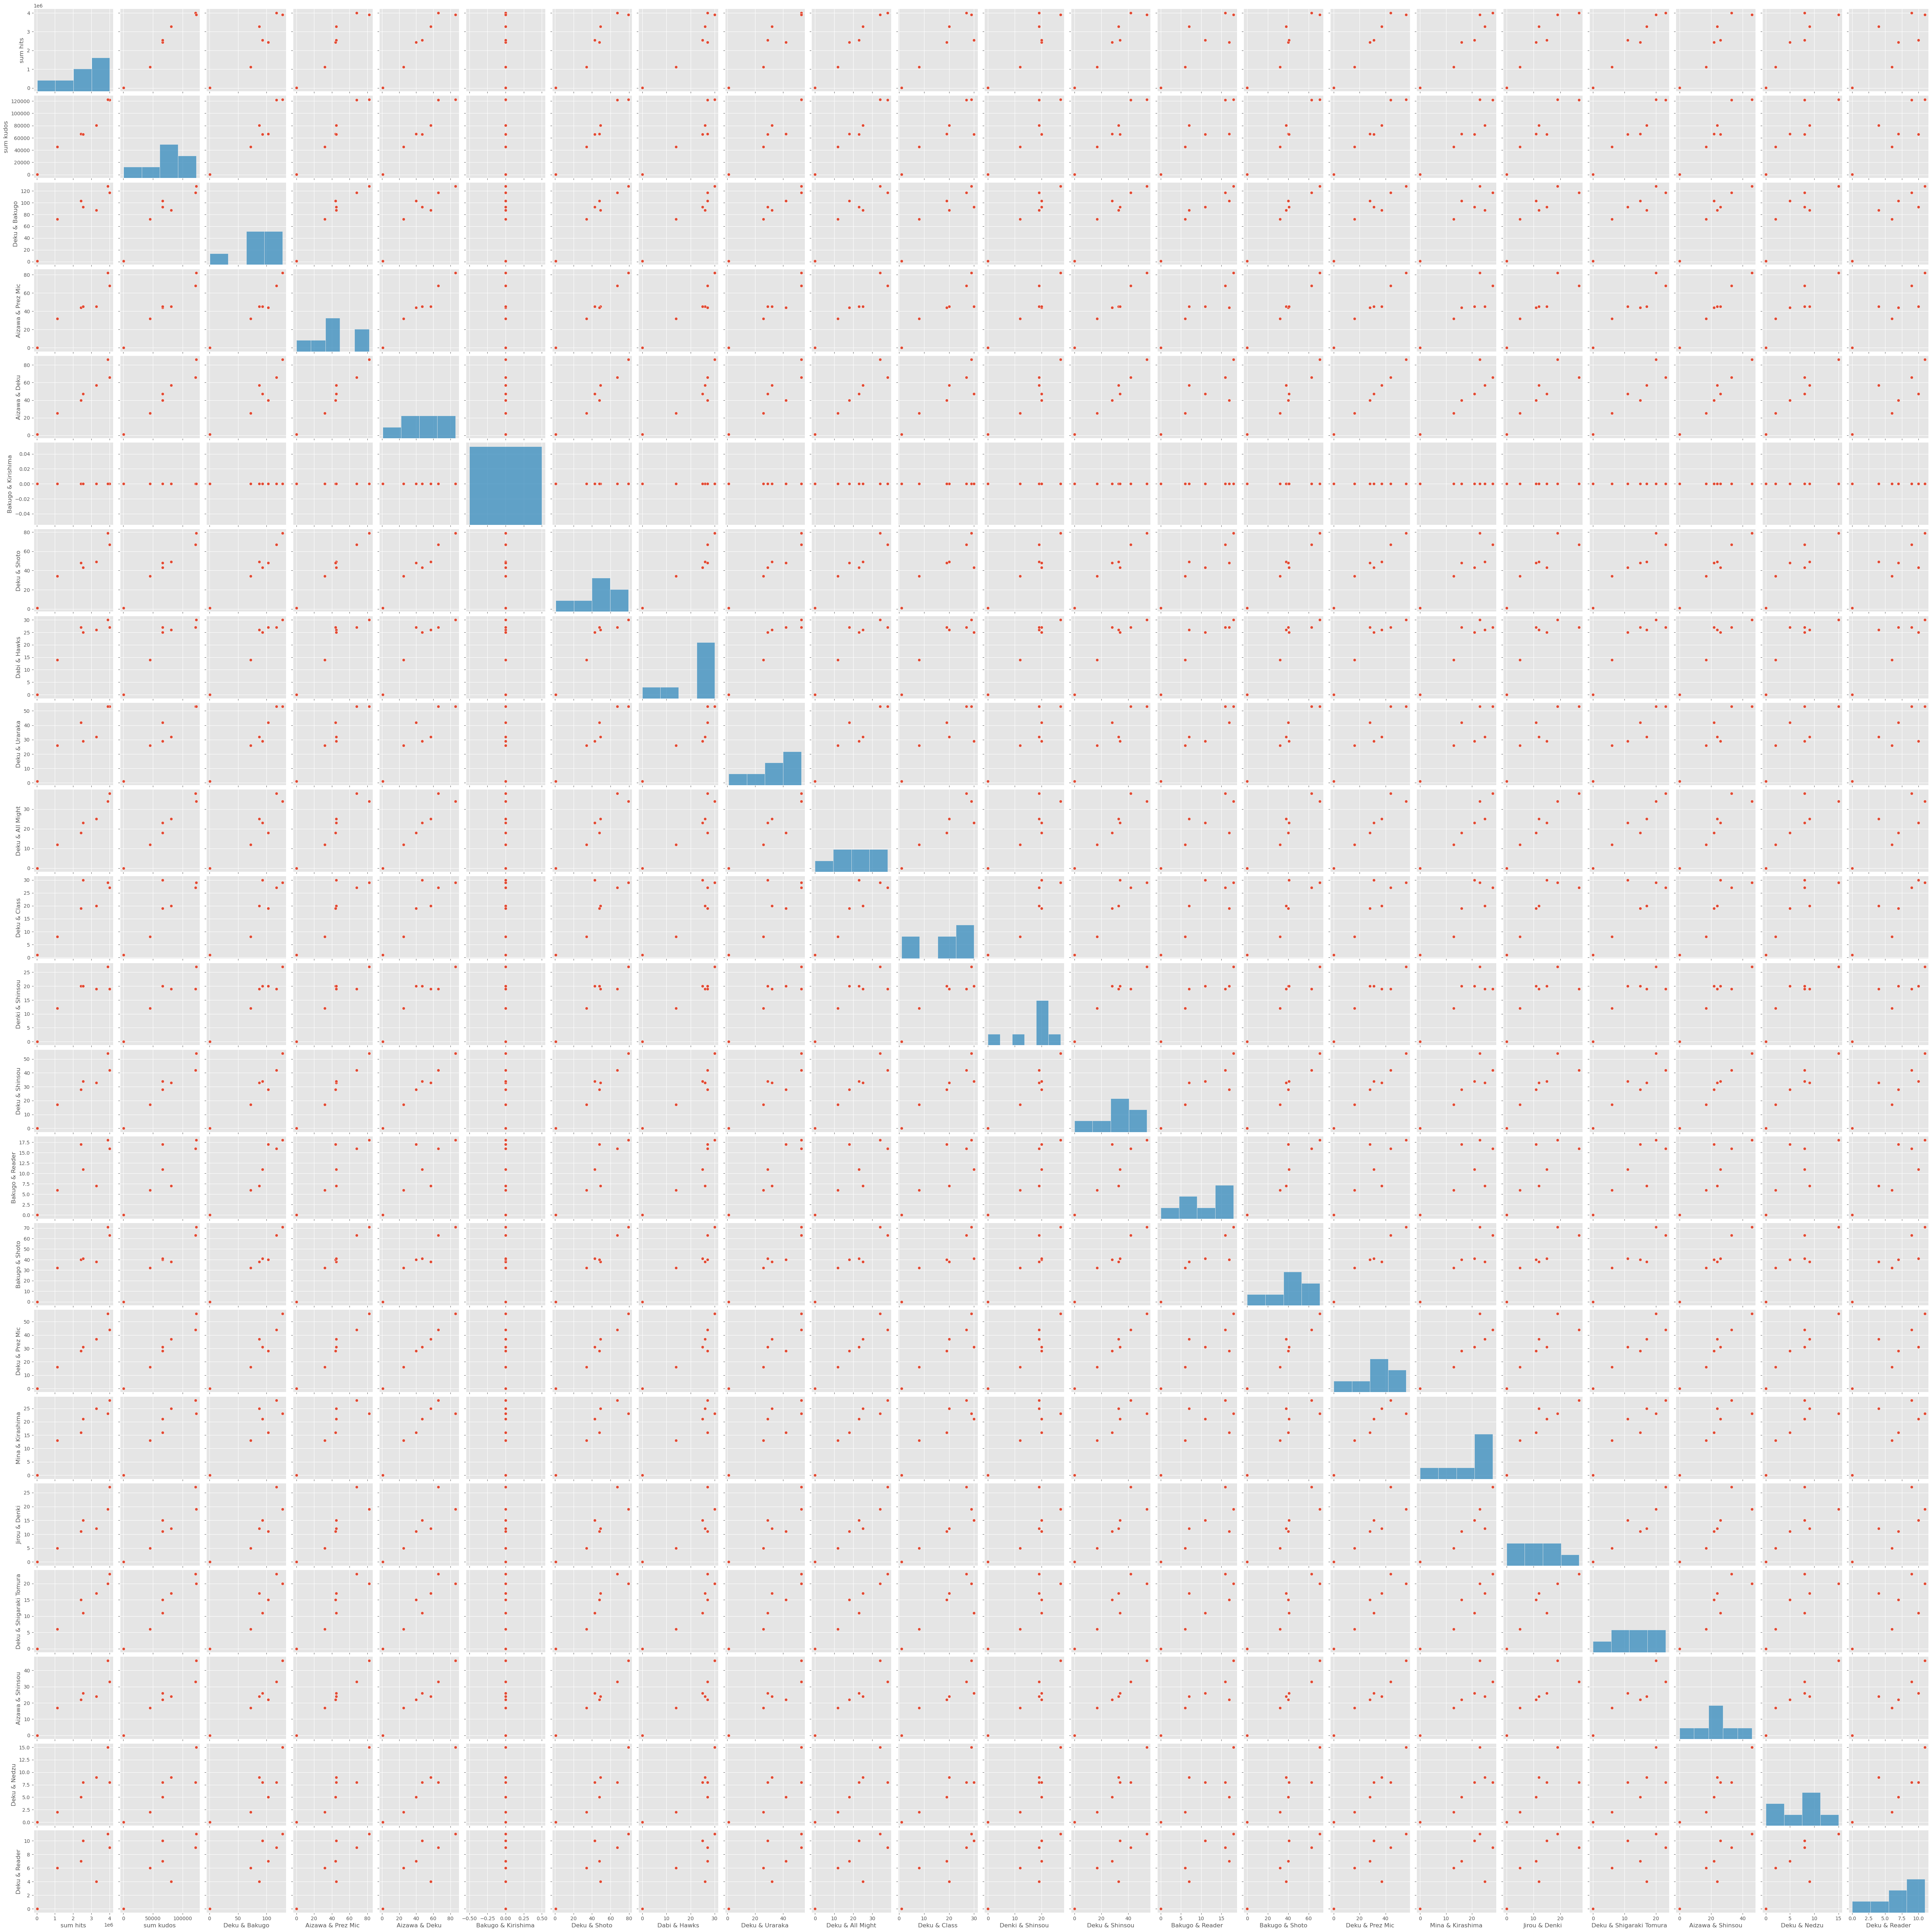

In [15]:
train_scat = sns.pairplot(data = train_ships_only)
plt.show()

In [41]:
X = scale(train_sort.values)
pca_train_model = PCA()
X_PCA = pca_train_model.fit_transform(X)

pca_ship = pd.DataFrame(X_PCA, index = train_sort.index, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_ship.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
published,,,,,,,
2023-03-28,4.165641,2.526898,-0.102190,0.295434,-0.719025,-0.921288,2.811379e-16
2023-03-29,-1.210752,-1.154320,-0.797650,-1.233939,-1.345983,0.333060,2.811379e-16
2023-03-30,-0.695577,2.005320,-0.686567,0.197495,0.620455,1.176623,2.811379e-16
2023-03-31,-5.701515,-1.542513,-0.976511,1.536322,0.091661,-0.347345,2.811379e-16
2023-04-01,-7.390914,0.120564,2.067151,0.049472,-0.224103,0.142449,2.811379e-16


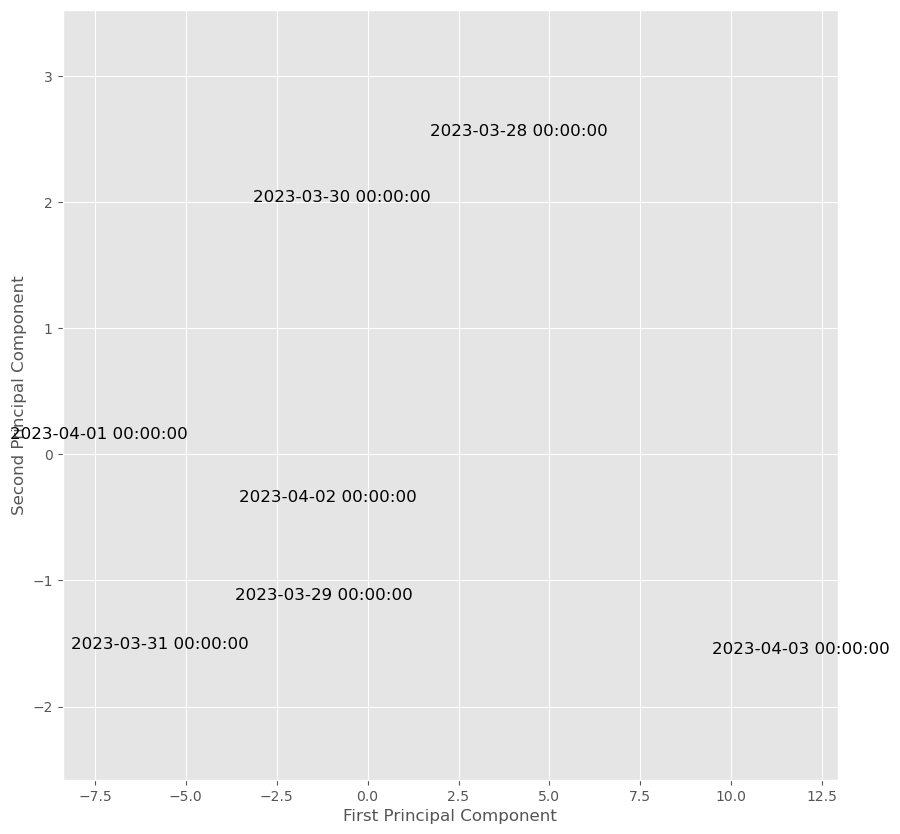

In [42]:
# Plot a PC1 and PC2
# creat subplots for the table
fig, ax = plt.subplots()

# set the x limit
ax.set_xlim(X_PCA[:,0].min() - 1, X_PCA[:,0].max() + 1)
# set the y axis
ax.set_ylim(X_PCA[:,1].min() - 1, X_PCA[:,1].max() + 1)

# creat the markers as the published dates
# for i and published for the index of train sort
for i, published in enumerate(train_sort.index):
    # annotate the ax
    ax.annotate(published, (X_PCA[i, 0], X_PCA[i, 1]), ha = 'center', fontsize = 12)

# lable the x axis
ax.set_xlabel('First Principal Component')
# lable the y axis
ax.set_ylabel('Second Principal Component')
# plot the graph
plt.show()

[8.70184925e-01 5.84377720e-02 2.40212478e-02 2.03061857e-02
 1.65475410e-02 1.05023286e-02 1.92776940e-33]


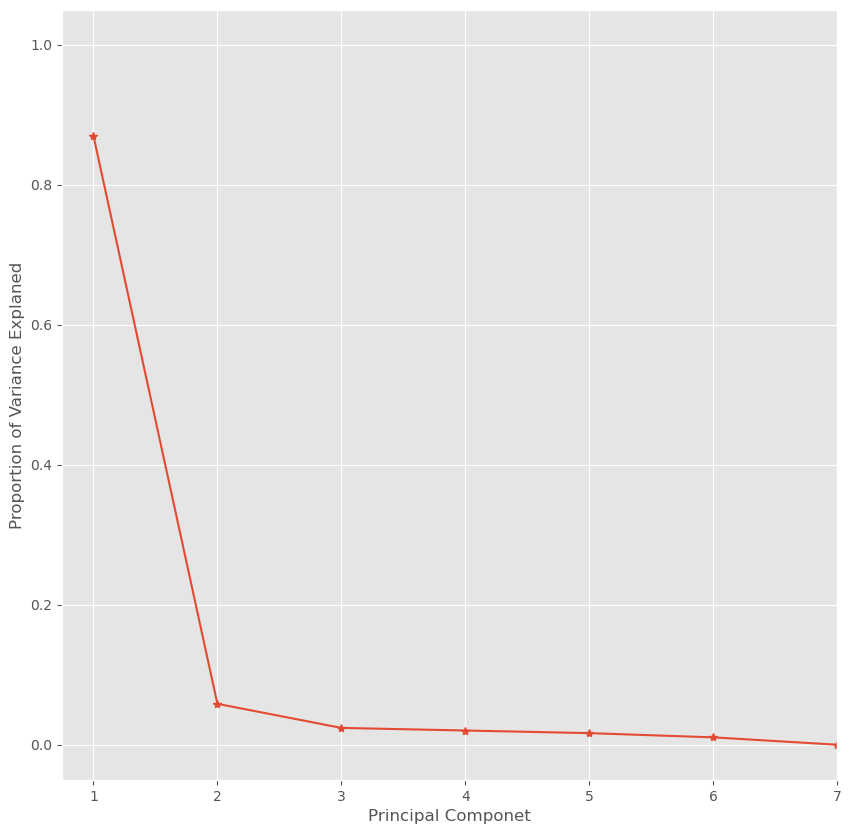

In [43]:
# Var ratio for the principal components
train_var_ratio = pca_train_model.explained_variance_ratio_
# print the varience ratio
print(train_var_ratio)

#plot the ratio for 1 through 7
plt.plot([1, 2, 3, 4, 5, 6, 7], train_var_ratio, '-*')

# y label
plt.ylabel('Proportion of Variance Explaned')
# xlabel
plt.xlabel('Principal Componet')
# set x limit to .25 below lowest value and .25 above highest value
plt.xlim(0.75, 4.25)
# set y limit to 0.05 above and below
plt.ylim(-0.05, 1.05)
# mark at 1, 2, 3, and 4
plt.xticks([1,2,3,4, 5, 6, 7])
# plot graph
plt.show()

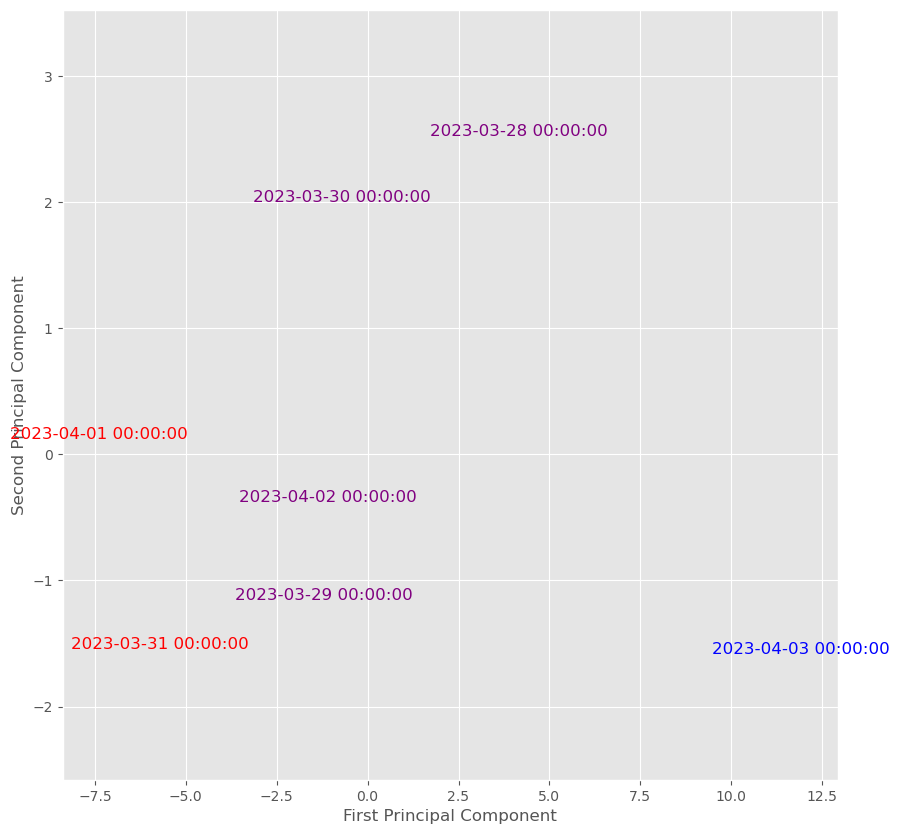

In [64]:
k_mean_train_mod = KMeans(n_clusters = 3)
k_mean_train_mod.fit(X)

clusters = k_mean_train_mod.labels_

colors = ['purple', 'blue', 'red']

pca_ship['cluster'] = clusters


fig, ax = plt.subplots()

# set the x limit
ax.set_xlim(X_PCA[:,0].min() - 1, X_PCA[:,0].max() + 1)
# set the y axis
ax.set_ylim(X_PCA[:,1].min() - 1, X_PCA[:,1].max() + 1)

# creat the markers as the published dates
# for i and published for the index of train sort
for i, published in enumerate(train_sort.index):
    # annotate the ax
    ax.annotate(published, (X_PCA[i, 0], X_PCA[i, 1]), ha = 'center', fontsize = 12, color = colors[pca_ship['cluster'][published]])

# lable the x axis
ax.set_xlabel('First Principal Component')
# lable the y axis
ax.set_ylabel('Second Principal Component')
# plot the graph
plt.show()

In [63]:
AO3_test['sum hits'] = AO3_test['hits']
AO3_test['sum kudos'] = AO3_test['kudos']
test_sort = AO3_test.groupby(['published']).agg({'hits': 'mean','sum hits': 'sum', 'kudos': 'mean', 'sum kudos': 'sum', 'Deku': 'sum', 'Bakugo': 'sum', 'Deku & Bakugo': 'sum', 'Aizawa': 'sum',
       'Prez Mic': 'sum', 'Aizawa & Prez Mic': 'sum', 'Aizawa & Deku': 'sum', 'Enjiro': 'sum',
       'Bakugo & Kirishima': 'sum', 'Shoto': 'sum', 'Deku & Shoto': 'sum', 'Dabi': 'sum', 'Hawks': 'sum',
       'Dabi & Hawks': 'sum', 'Uraraka': 'sum', 'Deku & Uraraka': 'sum', 'All Might': 'sum',
       'Deku & All Might': 'sum', 'Class': 'sum', 'Deku & Class': 'sum', 'Denki': 'sum', 'Shinsou': 'sum',
       'Denki & Shinsou': 'sum', 'Deku & Shinsou': 'sum', 'Reader': 'sum', 'Bakugo & Reader': 'sum',
       'Bakugo & Shoto': 'sum', 'Deku & Prez Mic': 'sum', 'Mina': 'sum', 'Kirashima': 'sum',
       'Mina & Kirashima': 'sum', 'Jirou': 'sum', 'Jirou & Denki': 'sum', 'Shigaraki Tomura': 'sum',
       'Deku & Shigaraki Tomura': 'sum', 'Aizawa & Shinsou': 'sum', 'Nedzu': 'sum', 'Deku & Nedzu': 'sum',
       'Deku & Reader': 'sum'})
test_sort.describe()

,hits,sum hits,kudos,sum kudos,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,4535.731273,73348.112805,280.602466,3971.079268,6.256098,4.774390,4.015244,2.536585,1.658537,1.643293,...,0.570122,0.570122,0.448171,0.448171,0.429878,0.429878,0.942073,0.146341,0.146341,0.213415
std,4768.478672,88953.395917,370.192004,3436.699162,3.466082,2.903812,2.578981,1.943830,1.481544,1.472755,...,0.763036,0.763036,0.752405,0.752405,0.734446,0.734446,1.057808,0.370864,0.370864,0.452857
min,24.000000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1869.458333,24859.000000,137.114035,1714.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3117.527778,47721.500000,201.178846,3139.500000,7.000000,5.000000,4.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5301.704167,89351.500000,322.434868,5404.250000,9.000000,7.000000,6.000000,4.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,33011.500000,660230.000000,4854.000000,23119.000000,15.000000,12.000000,11.000000,8.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [45]:
test_ships_only = test_sort.loc[:,['sum hits', 'sum kudos', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]
test_ships = test_sort.loc[:,['Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]

In [47]:
Xtest = scale(test_sort.values)
pca_test_model = PCA()
Xtest_PCA = pca_test_model.fit_transform(Xtest)

cols = []
for i in range(1, 44):
    na = f'PC{i}'
    cols.append(na)
pca_test_ship = pd.DataFrame(Xtest_PCA, index = test_sort.index, columns = cols)
pca_test_ship.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43
published,,,,,,,,,,,,,,,,,,,,,
2021-09-21,-2.153657,1.354194,0.889337,-0.178748,0.030523,-0.197112,-1.098972,-1.051363,-1.061333,-1.466143,...,-7.475754e-16,-9.848584e-16,-6.434940e-16,1.218532e-15,-6.330418e-16,-4.535857e-17,-9.717413e-17,-4.147286e-16,-1.405770e-16,-7.109788e-17
2021-09-23,-5.178026,-0.374056,-0.459702,0.878247,-0.470905,-0.068994,0.936313,-0.148478,0.081253,-0.188244,...,3.920607e-16,5.754250e-16,2.484908e-16,-8.568859e-16,4.436575e-16,-2.836489e-16,2.214511e-17,-4.805548e-17,-2.038313e-16,-1.138078e-16
2021-09-24,-1.745980,-0.561054,1.314219,0.693141,0.968824,-1.716194,0.283337,0.297199,-0.784774,0.290148,...,-1.205314e-16,5.483459e-17,-2.553566e-16,-6.413556e-16,7.027125e-16,-5.019089e-16,-3.180693e-16,-2.578180e-16,1.112851e-16,1.329820e-16
2021-09-26,0.653339,-0.829027,2.314493,-0.045866,-1.155316,1.274384,0.897709,0.341551,-1.052318,-0.319990,...,1.528950e-16,-7.221097e-16,-1.330105e-16,-3.689475e-16,1.531293e-16,3.640440e-16,-1.528218e-16,3.076460e-16,2.445363e-16,2.059701e-16
2021-09-29,0.605988,0.034880,-0.889708,0.520836,0.098813,0.458962,-0.248628,1.158252,0.409552,-2.022066,...,5.539846e-16,-1.341822e-16,7.311235e-16,1.265871e-16,-2.374833e-16,7.315678e-16,-2.312597e-16,7.667107e-16,5.710787e-16,2.549264e-16


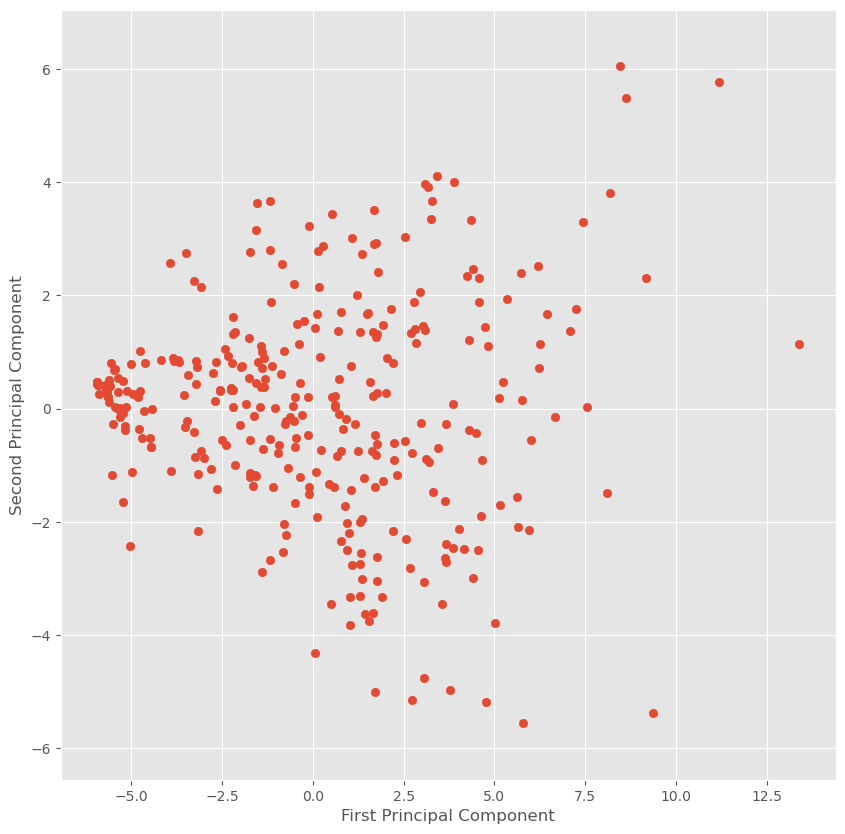

In [58]:
# Plot a PC1 and PC2
# creat subplots for the table
fig, ax = plt.subplots()

# set the x limit
ax.set_xlim(Xtest_PCA[:,0].min() - 1, Xtest_PCA[:,0].max() + 1)
# set the y axis
ax.set_ylim(Xtest_PCA[:,1].min() - 1, Xtest_PCA[:,1].max() + 1)

# creat the markers as the published dates
# for i and published for the index of train sort
ax.scatter(pca_test_ship['PC1'], pca_test_ship['PC2'])

# lable the x axis
ax.set_xlabel('First Principal Component')
# lable the y axis
ax.set_ylabel('Second Principal Component')
# plot the graph
plt.show()

[3.32460710e-01 8.85313811e-02 6.48532429e-02 6.17290170e-02
 5.39022424e-02 5.34494302e-02 4.58159975e-02 4.12863256e-02
 3.72863909e-02 3.38495113e-02 2.96240255e-02 2.76930744e-02
 2.39699889e-02 2.06779816e-02 1.65348217e-02 1.38646788e-02
 1.17689286e-02 1.00110422e-02 8.97367276e-03 6.73999129e-03
 6.20382097e-03 4.14696482e-03 1.84356662e-03 1.34789089e-03
 9.82157407e-04 9.30794894e-04 7.65674145e-04 5.19941016e-04
 1.67992540e-04 6.32834363e-05 5.45815311e-06 6.55663142e-32
 2.05370828e-33 2.05370828e-33 2.05370828e-33 2.05370828e-33
 2.05370828e-33 2.05370828e-33 2.05370828e-33 2.05370828e-33
 2.05370828e-33 2.05370828e-33 2.05370828e-33]


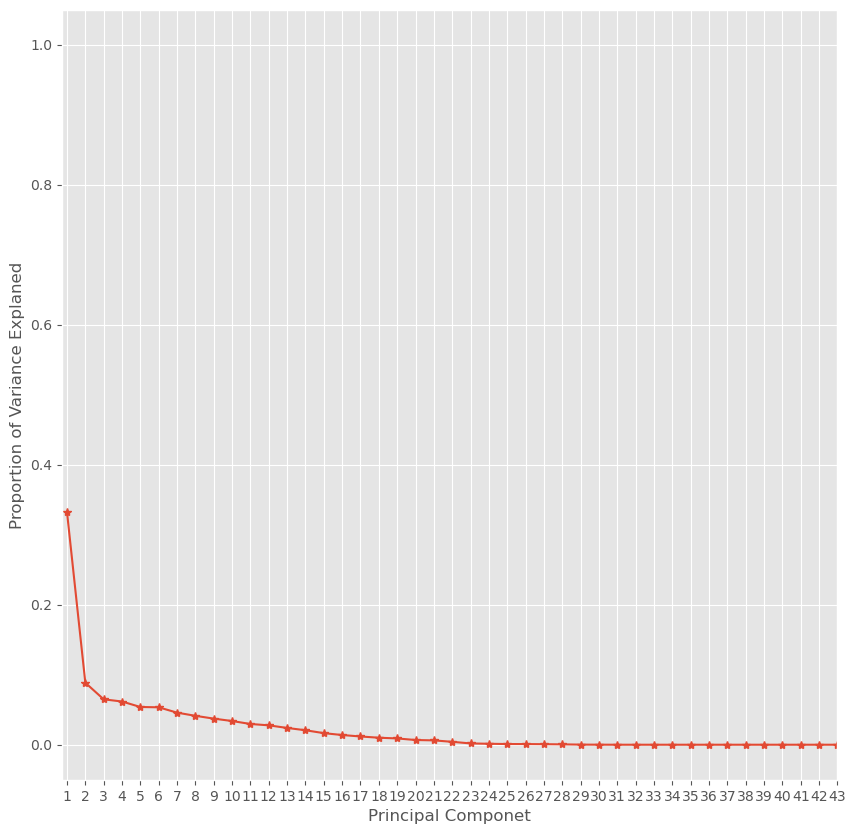

In [52]:
# Var ratio for the principal components
test_var_ratio = pca_test_model.explained_variance_ratio_
# print the varience ratio
print(test_var_ratio)

#plot the ratio for 1 through 7
plt.plot([*range(1, 44)], test_var_ratio, '-*')

# y label
plt.ylabel('Proportion of Variance Explaned')
# xlabel
plt.xlabel('Principal Componet')
# set x limit to .25 below lowest value and .25 above highest value
plt.xlim(0.75, 4.25)
# set y limit to 0.05 above and below
plt.ylim(-0.05, 1.05)
# mark at 1, 2, 3, and 4
plt.xticks([*range(1, 44)])
# plot graph
plt.show()

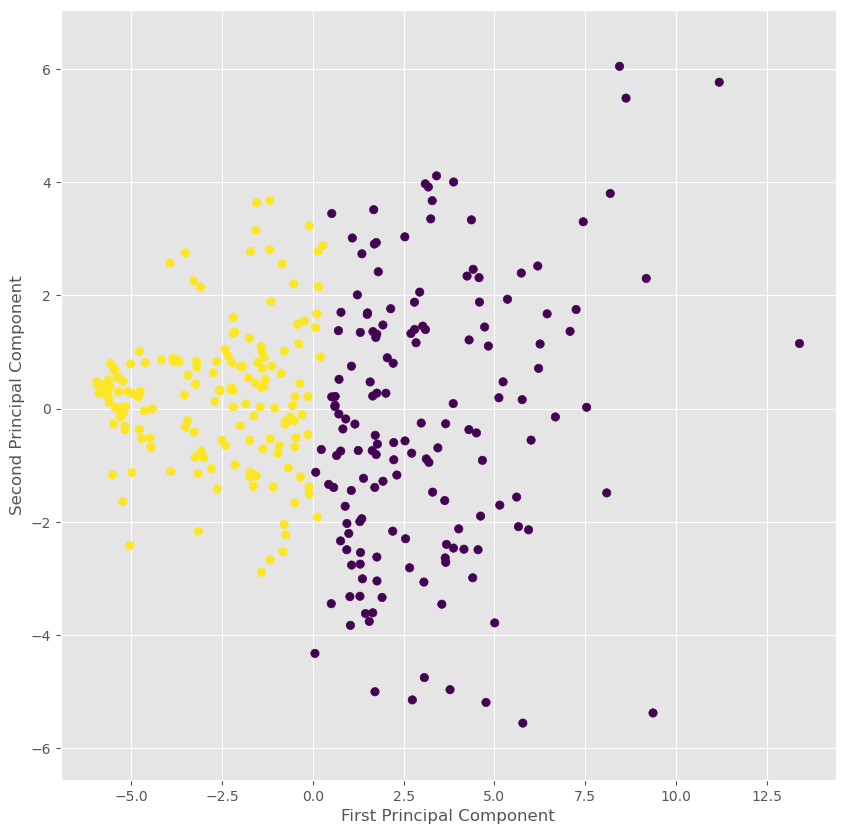

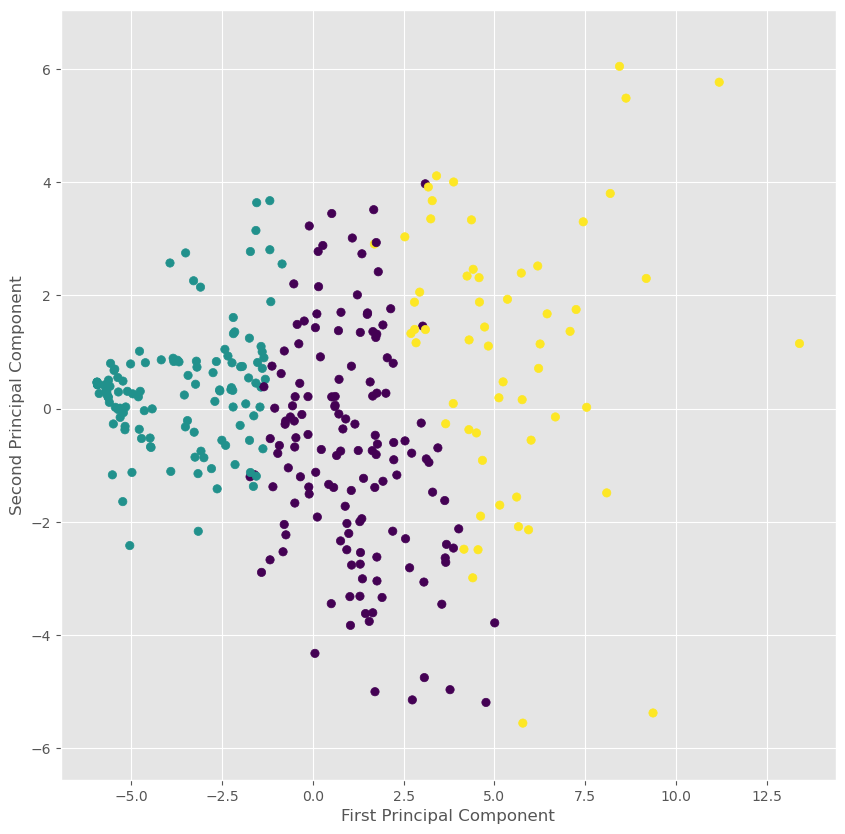

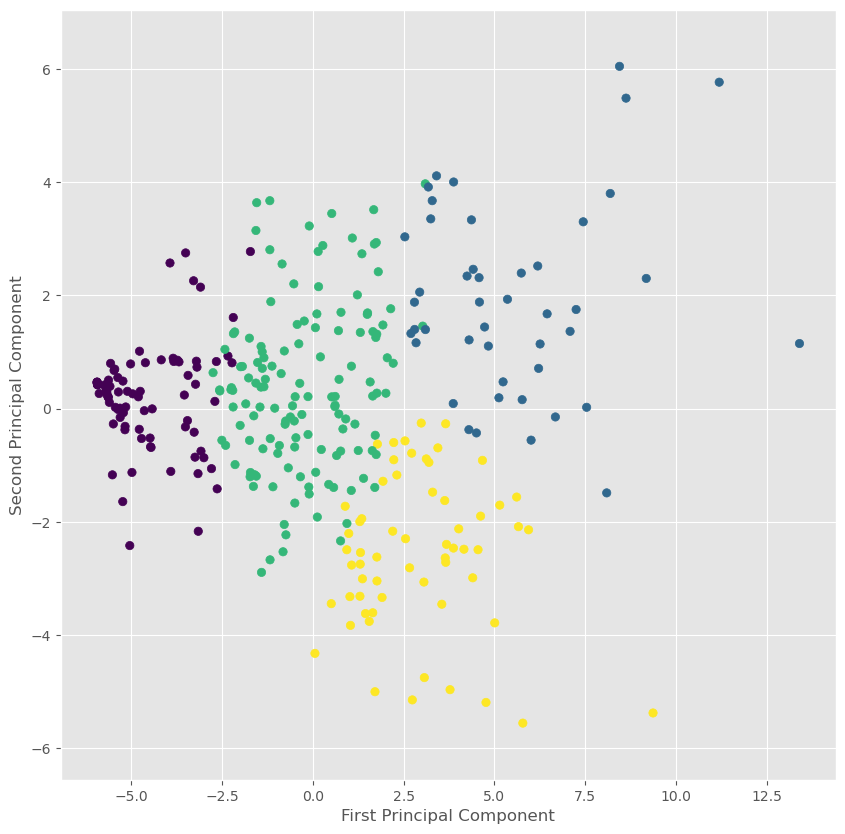

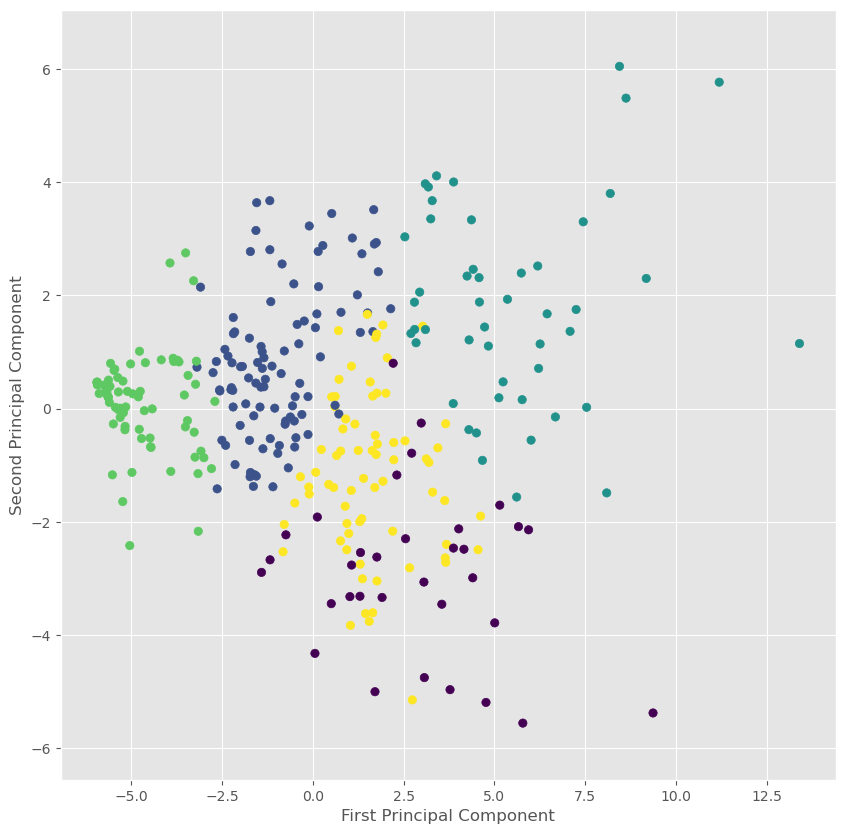

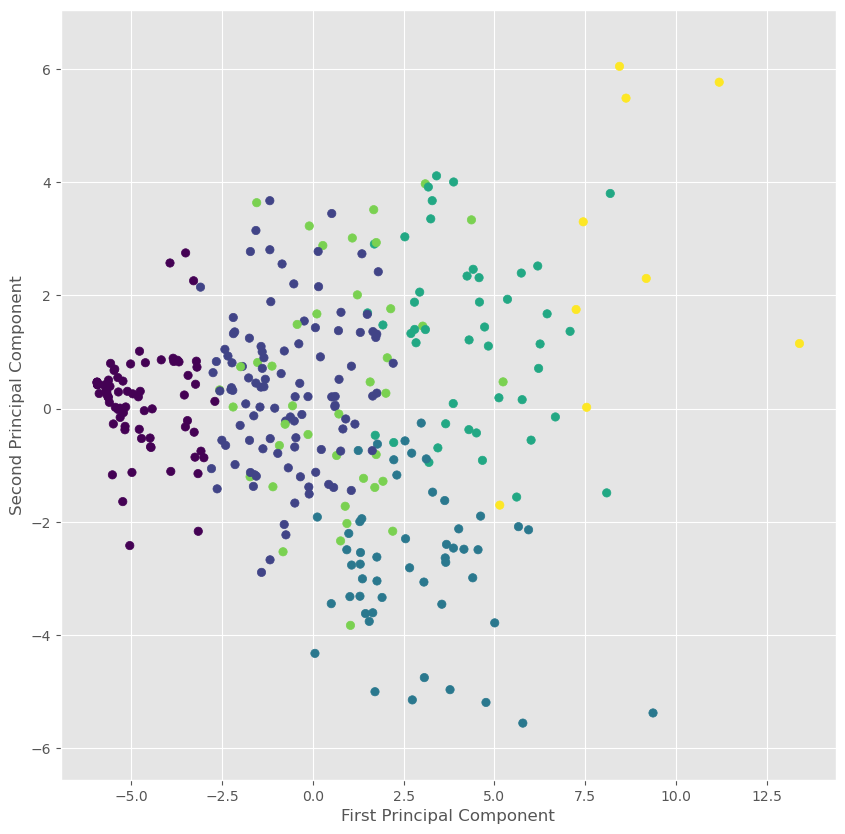

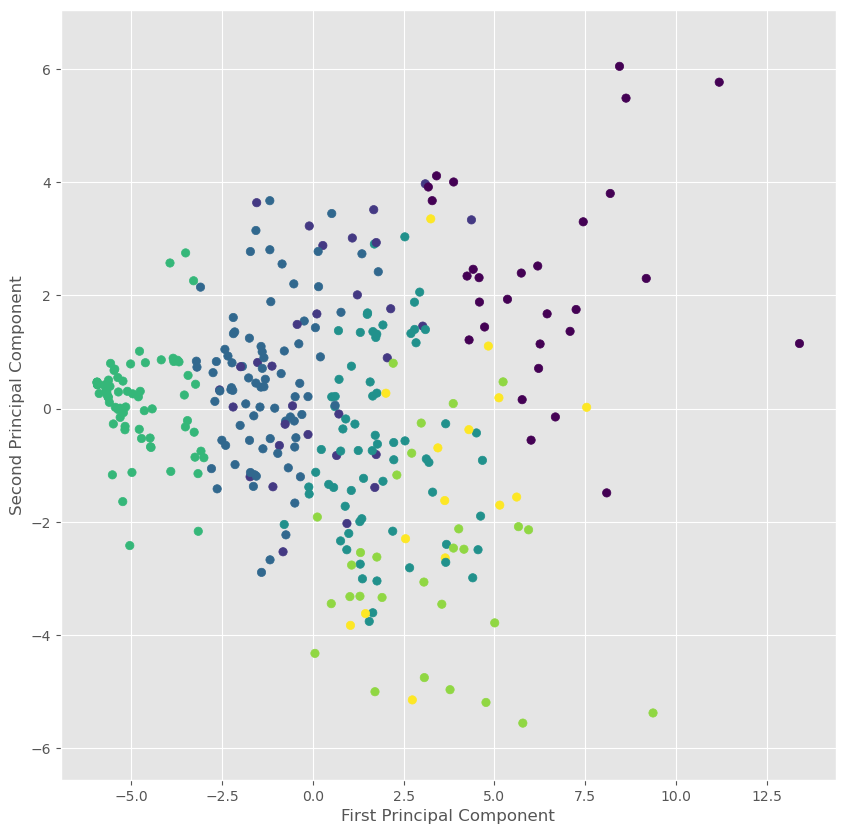

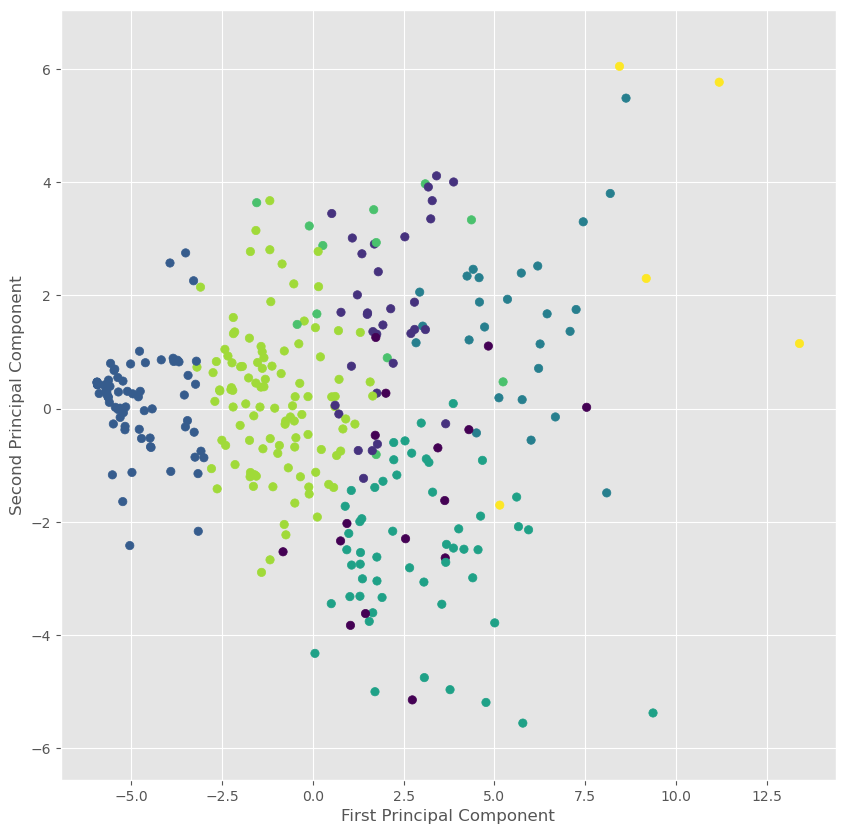

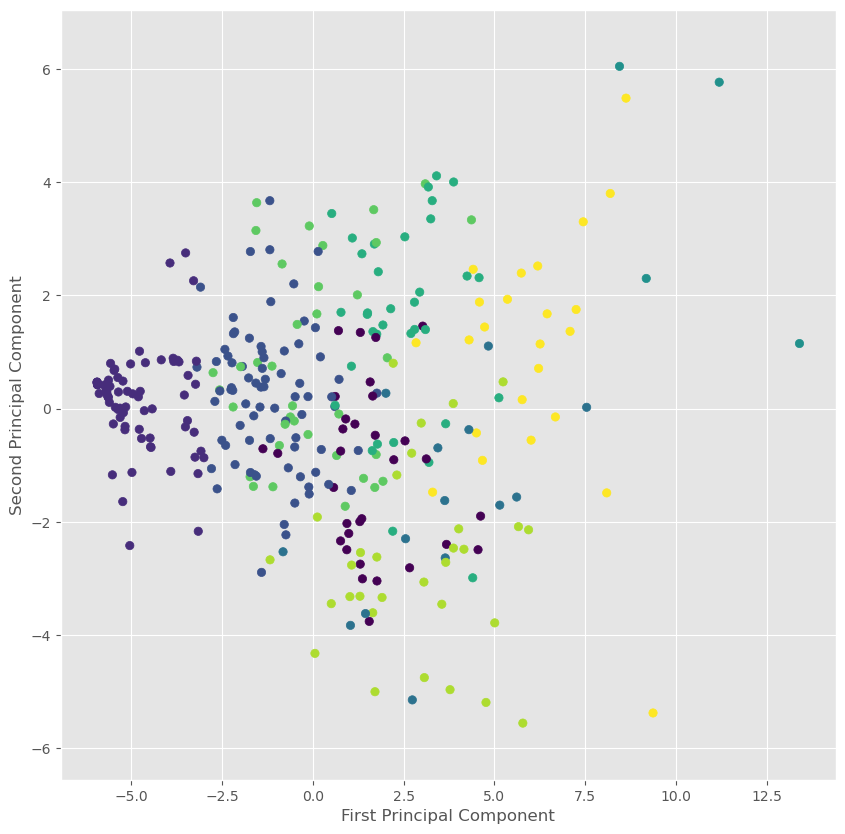

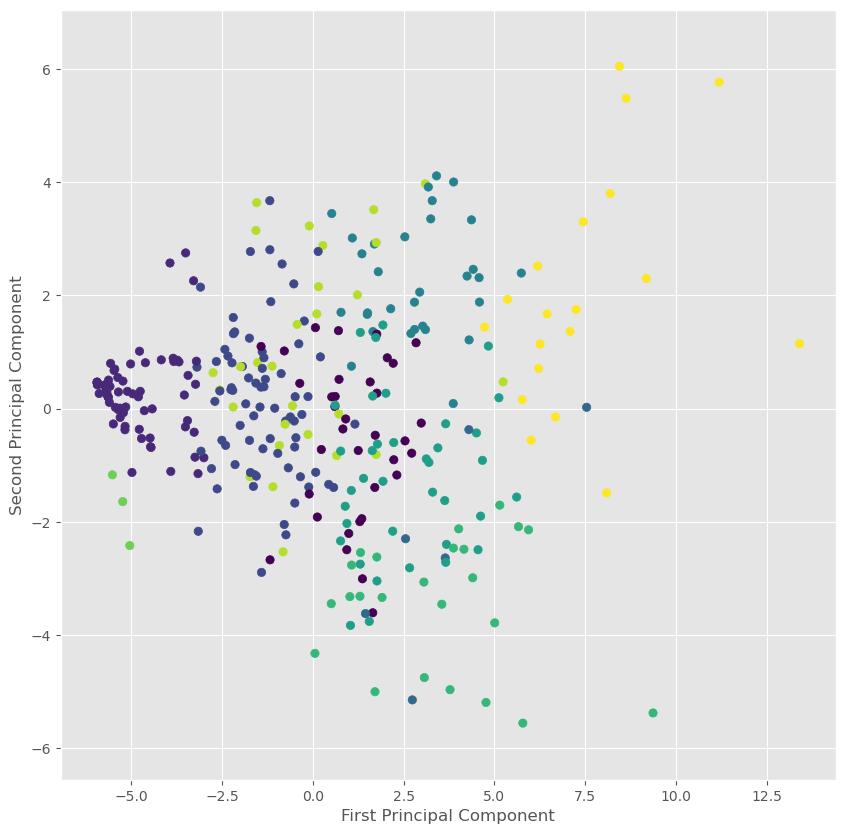

In [70]:
for k in range(2, 11):
    k_mean_test_mod = KMeans(n_clusters = k)
    k_mean_test_mod.fit(Xtest)

    clusters = k_mean_test_mod.labels_


    pca_test_ship['cluster'] = clusters


    fig, ax = plt.subplots()

    # set the x limit
    ax.set_xlim(Xtest_PCA[:,0].min() - 1, Xtest_PCA[:,0].max() + 1)
    # set the y axis
    ax.set_ylim(Xtest_PCA[:,1].min() - 1, Xtest_PCA[:,1].max() + 1)

    ax.scatter(pca_test_ship['PC1'], pca_test_ship['PC2'], c = pca_test_ship['cluster'])

    # lable the x axis
    ax.set_xlabel('First Principal Component')
    # lable the y axis
    ax.set_ylabel('Second Principal Component')
    # plot the graph
    plt.show()